# <font color=brown><center>Analysis on Advertising Dataset - Implementation of Regression</center></font>

# <font color=purple>Importing the Dependencies</font>

In [484]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# <font color=purple>Importing Dataset</font>

In [485]:
#loading the advertising dataset from csv file to pandas dataframe
advertising_data=pd.read_csv('/content/drive/MyDrive/Project/advertising.csv')

# <font color=purple>Introductory Details About Data</font>

In [486]:
#printing first five rows of the dataframe
advertising_data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [487]:
#printing last five rows of the dataframe
advertising_data.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [488]:
#checking all the columns in the dataset
advertising_data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [489]:
#droping Unnamed: 0 column from dataset as it is not important for analysis
advertising_data.drop('Unnamed: 0',axis=1,inplace=True)

In [490]:
#total number of rows and columns in the dataset
advertising_data.shape

(200, 4)

### **Observation**<br>- Dataset comprises 200 observation and 5 features.<br>- Out of 5, one is Target variable and rest 4 is input variable.

In [491]:
#Statistics Summary
advertising_data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# <font color=purple>Handling Missing Data</font>

In [492]:
#checking null values in dataset
advertising_data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

# <font color=purple>Visualizing Missing Values</font>

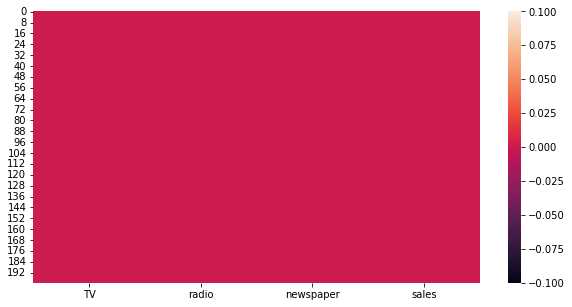

In [493]:
#visualizing missing values
plt.figure(figsize=(10,5))
sns.heatmap(advertising_data.isnull())
plt.show()

### **Observation**<br>- We see all the columns of the dataset are free from null values and all of them are numeric type.

# <font color=purple>Visualizing Correlation</font>

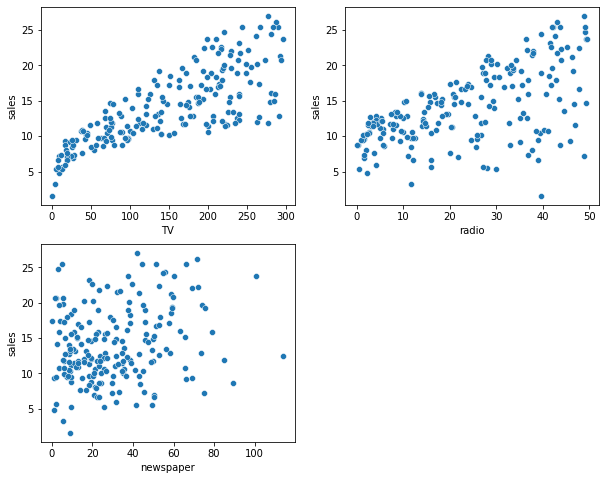

In [494]:
#checking correlation
Y=advertising_data['sales']
X=['TV', 'radio', 'newspaper']
plt.figure(figsize=(10,8))
for i,col in enumerate(X):
  plt.subplot(2,2,i+1)
  sns.scatterplot(advertising_data[col],Y)
plt.show()

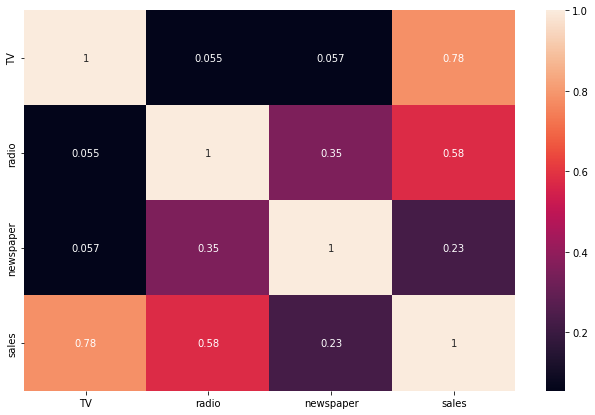

In [495]:
#heatmap for correlation
plt.figure(figsize=(11,7))
sns.heatmap(advertising_data.corr(),annot=True)
plt.show()

### **Observation**<br>- From the Scatterplot and the heatmap, the variable TV seems to be most correlated with Sales. So performing simple linear regression using TV as our feature variable.

# **Performing Model using Simple Linear Regression**

# <font color=purple>Splitting Dependent and Independent Features</font>

In [496]:
#select input and output from dataset
X=advertising_data[["TV"]] 
Y=advertising_data['sales']

# <font color=purple>Splitting into test and training set</font>

In [497]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

# <font color=purple>Training on training set</font>

In [498]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

# <font color=purple>Slope & Intercept of Line</font>

In [499]:
m=lr.coef_
print("Slope : ",m)
c=lr.intercept_
print("Intercept : ",c)

Slope :  [0.04812204]
Intercept :  6.923519536059553


# <font color=purple>Prediction on test set</font>

In [500]:
Y_pred=lr.predict(X_test) #Y_predict = M*X+C
Y_pred

array([17.06764591, 16.66823297, 11.52879892, 20.4073156 , 19.1368937 ,
       20.57093054, 14.78184893, 15.62398466, 10.32093567, 17.2890073 ,
       14.83959538, 10.25356482, 17.25532187, 12.20731971, 17.78947654,
       12.97246017, 13.26119242, 20.91259704,  8.1554438 , 17.06283371,
       11.75497252, 10.18619396,  8.13138278, 12.09182681, 12.35649804,
       15.98971218,  8.99757953, 18.89628349, 14.95027608, 18.47762173,
       18.46799732, 18.2081383 , 14.12738917, 15.11389102, 18.87703468,
       15.82128503, 17.62586159, 13.15051172, 17.35637816,  7.86671155,
        7.55391828, 11.2737521 ,  7.82340171, 16.74522823,  7.27481044,
       14.01189627, 10.68666319, 17.89534503, 16.78853807, 17.96752809,
       20.864475  , 12.84734286,  7.85708714, 15.71060434, 19.70473379,
       14.89252963, 17.43818563,  8.12657058, 18.0926454 ,  8.99276733])

# <font color=purple>Evaluating the performance of Model</font>

In [501]:
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(Y_test,Y_pred)
print("Mean Squared Error : ",mse)
rmse=np.sqrt(mse)
print("Root Mean Squared Error : ",rmse)
r2=r2_score(Y_test,Y_pred)
print("R2 score : ",r2)

Mean Squared Error :  10.571057434656955
Root Mean Squared Error :  3.251316261863333
R2 score :  0.575061860494331


### **Observation**<br>- Since the R2 Score is 0.5750 this means model is to be Underfit, reason for ths is because we didn't provide enough information for training.

# **Performing Model using Multiple Linear Regression**

# <font color=purple>Splitting Dependent and Independent Features</font>

In [502]:
#select input and output from dataset
X=advertising_data[['TV','radio', 'newspaper']] 
Y=advertising_data['sales']

# <font color=purple>Splitting into test and training set</font>

In [503]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

# <font color=purple>Feature Scaling using StandardScaler</font>

In [504]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train) #on training data
X_test=ss.transform(X_test) #on testing data

# <font color=purple>Training on training set</font>

In [505]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

# <font color=purple>Slope & Intercept of Line</font>

In [506]:
m=lr.coef_
print("Slope : ",m)
c=lr.intercept_
print("Intercept : ",c)

Slope :  [4.06552835 2.68518849 0.03980877]
Intercept :  13.79142857142857


# <font color=purple>Prediction on test set</font>

In [507]:
Y_pred=lr.predict(X_test) #Y_predict = M*X+C
Y_pred

array([21.66318307, 16.44137936,  7.69144625, 17.9163172 , 18.67047113,
       23.79199311, 16.2825425 , 13.44138683,  9.15294033, 17.32475313,
       14.43922876,  9.84019547, 17.26329945, 16.62853147, 15.09158705,
       15.50173894, 12.43404074, 17.32591521, 11.04327486, 18.05652777,
        9.35309526, 12.79465958,  8.73413846, 10.47225333, 11.38216042,
       15.02658554,  9.7406823 , 19.44676903, 18.19211174, 17.20178728,
       21.56359539, 14.70484262, 16.2635213 , 12.37098906, 19.97059316,
       15.36768988, 14.00399515, 10.0772945 , 20.91891557,  7.43833283,
        3.67031166,  7.27760354,  5.99523188, 18.41497546,  8.31868226,
       14.1090252 , 14.93697583, 20.35882814, 20.56271636, 19.55380813,
       24.10360923, 14.84985778,  6.71474914, 19.77761567, 18.93996367,
       12.5109195 , 14.20052652,  6.10844697, 15.3695344 ,  9.56769111])

# <font color=purple>Evaluating the performance of Model</font>

In [508]:
mse=mean_squared_error(Y_test,Y_pred)
print("Mean Squared Error : ",mse)
rmse=np.sqrt(mse)
print("Root Mean Squared Error : ",rmse)
r2=r2_score(Y_test,Y_pred)
print("R2 score : ",r2)

Mean Squared Error :  1.928924907466572
Root Mean Squared Error :  1.3888574107756966
R2 score :  0.9224605706201435


## **Observation**<br>- Here R2 Score is best as it is nearest to +1

# **Performing Assumption of Linear Regression**

## <font color=purple> Assumption -  Check for Multicollinearity</font>

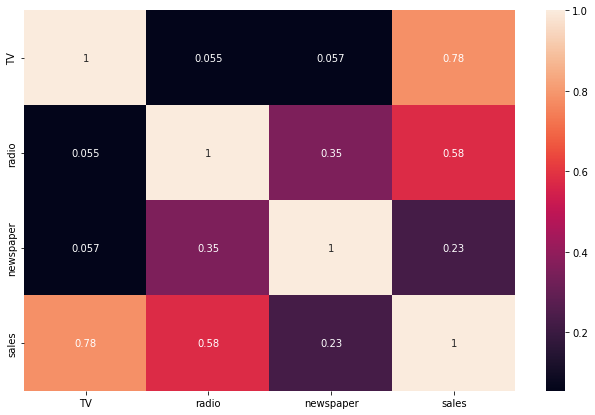

In [509]:
#plotting Heatmap for checking the correlation between inputs
plt.figure(figsize=(11,7))
sns.heatmap(advertising_data.corr(),annot=True)
plt.show()

### **Observatiom**<br> - There is relatively high positive correlation between newspaper and radio, means radio and newspaper have Multicollinearity.<br>- From Output sales and input radio has 0.58 and newspaper has 0.23 relation.<br>- So we will remove newspaper as it has less relation

In [510]:
#Splitting Dependent and Independent Features

X=advertising_data[['TV', 'radio']]
Y=advertising_data['sales']

In [511]:
#Splitting Dependent and Independent Features

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1) 

In [512]:
#Feature Scaling using StandardScaler

ss=StandardScaler()
X_train=ss.fit_transform(X_train) #on training data
X_test=ss.transform(X_test) #on testing data

In [513]:
#Training on training set

lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [514]:
#Slope & Intercept of Line

m=lr.coef_
print("Slope : ",m)
c=lr.intercept_
print("Intercept : ",c)

Slope :  [4.06756287 2.70136813]
Intercept :  13.79142857142857


In [515]:
#Prediction on test set

Y_pred=lr.predict(X_test) #Y_predict = M*X+C
Y_pred


array([21.6786746 , 16.43892004,  7.70903733, 17.92158421, 18.67111499,
       23.74835071, 16.24962798, 13.37657045,  9.12364788, 17.27585015,
       14.40513872,  9.85730919, 17.31402746, 16.61437382, 15.02857874,
       15.42489496, 12.42021473, 17.34892466, 11.09570896, 18.10320281,
        9.38655615, 12.65171582,  8.70947008, 10.49704698, 11.35942404,
       15.03043294,  9.73268033, 19.46660993, 18.26160716, 17.21035792,
       21.60669421, 14.58454377, 16.32136242, 12.3456783 , 19.99853614,
       15.38120487, 14.01613968, 10.05601014, 20.94792024,  7.45626202,
        3.65120693,  7.26465144,  5.99278035, 18.39717578,  8.2996665 ,
       14.13011074, 14.95229617, 20.37261349, 20.60678937, 19.48376432,
       24.08819667, 14.89416249,  6.71850002, 19.74995269, 18.99448081,
       12.52042181, 14.18823598,  6.09331077, 15.39558485,  9.58586241])

In [516]:
#Evaluating the performance of Model

mse=mean_squared_error(Y_test,Y_pred)
print("Mean Squared Error : ",mse)
rmse=np.sqrt(mse)
print("Root Mean Squared Error : ",rmse)
r2=r2_score(Y_test,Y_pred)
print("R2 score : ",r2)

Mean Squared Error :  1.9147050289721788
Root Mean Squared Error :  1.383728668840889
R2 score :  0.9230321850256801


### **Observation**<br>- After removing the Multicollinearty, R2 score is 0.9230321850256801

## <font color=purple> Assumption - Linearity of Residuals</font>

In [517]:
#checking residual
residual = Y_test-Y_pred

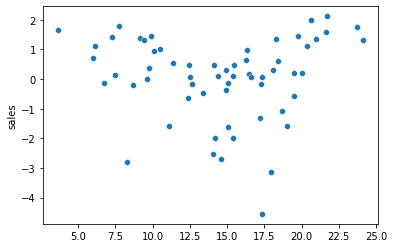

In [518]:
#visualizing Scatter Plot between Y_pred and residual
sns.scatterplot(Y_pred,residual)
plt.show()

### **Observation**<br>- Linearity of Residual fails, as there is no linear Relationship between independent and dependent variable.

## <font color=purple> Assumption - Homoscedasticity</font>

### **Observation**<br>- Since the Assumption of Linearity of Residual fails, then assumption of Homoscedastity also fails.

## <font color=purple> Assumption - Normality of Residual</font>

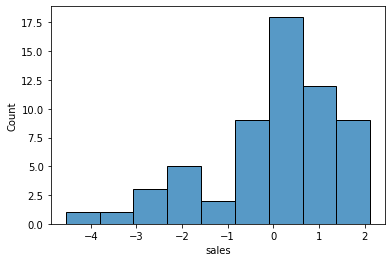

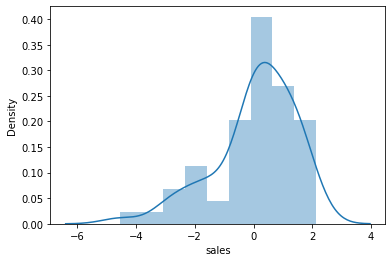

Residual Skewness :  -1.0935181639447331


In [519]:
sns.histplot(residual)
plt.show()
sns.distplot(residual)
plt.show()
#check skewness
print("Residual Skewness : ", residual.skew())

### **Observation**<br>- from the above, we can see -ve skewness in the graph that means no normal distributed curve can  be plotted hence it is Assymetric curve because of which this assumption is not satisfied.

## Since Out of 4, 3 Assumption is fails

# **Performing Model using Polynomial Linear Regression**

In [520]:
#Splitting Dependent and Independent Features

X=advertising_data[['TV', 'radio']]
Y=advertising_data['sales']

In [521]:
from sklearn.preprocessing import PolynomialFeatures

#pf=PolynomialFeatures(2)
pf=PolynomialFeatures(3)
X_poly=pf.fit_transform(X)
X_poly

array([[1.00000000e+00, 2.30100000e+02, 3.78000000e+01, ...,
        2.00135918e+06, 3.28776084e+05, 5.40101520e+04],
       [1.00000000e+00, 4.45000000e+01, 3.93000000e+01, ...,
        7.78238250e+04, 6.87298050e+04, 6.06984570e+04],
       [1.00000000e+00, 1.72000000e+01, 4.59000000e+01, ...,
        1.35790560e+04, 3.62371320e+04, 9.67025790e+04],
       ...,
       [1.00000000e+00, 1.77000000e+02, 9.30000000e+00, ...,
        2.91359700e+05, 1.53087300e+04, 8.04357000e+02],
       [1.00000000e+00, 2.83600000e+02, 4.20000000e+01, ...,
        3.37801632e+06, 5.00270400e+05, 7.40880000e+04],
       [1.00000000e+00, 2.32100000e+02, 8.60000000e+00, ...,
        4.63285526e+05, 1.71661160e+04, 6.36056000e+02]])

In [522]:
#Splitting Dependent and Independent Features

X_train,X_test,Y_train,Y_test=train_test_split(X_poly,Y,test_size=0.3,random_state=1)

In [523]:
#Training on training set

lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [524]:
#Slope & Intercept of Line

m=lr.coef_
print("Slope : ",m)
c=lr.intercept_
print("Intercept : ",c)

Slope :  [ 0.00000000e+00  9.16483199e-02  2.25347616e-02 -4.65701531e-04
  1.30652795e-03 -1.62567917e-04  8.31531755e-07 -7.44270012e-07
 -1.18928234e-06  9.37589630e-06]
Intercept :  4.162147476927448


In [525]:
#Prediction on test set

Y_pred=lr.predict(X_test) #Y_predict = M*X+C
Y_pred

array([23.84188798, 16.15436166,  9.59311778, 14.86575705, 17.42053977,
       25.47220033, 17.09714001, 12.92302282, 10.3562538 , 16.85479186,
       14.80887029, 10.76989194, 16.94016998, 17.57103614, 12.95422039,
       16.47942682, 13.34770761, 13.26078551,  8.64395867, 18.26807726,
       10.89674657, 12.56988193,  7.62422886, 11.79217251, 12.52303103,
       14.77338601,  9.40797795, 18.96444106, 19.63886835, 15.64685712,
       22.8911917 , 11.7418389 , 17.39782218, 12.09432297, 19.87279431,
       15.37308996, 11.59224156, 11.03779893, 22.48736008,  6.74877459,
        5.30047191,  9.29601801,  6.27325925, 18.92748401,  5.77961914,
       14.90236227, 14.90331875, 21.21181447, 22.26140752, 19.72659892,
       25.96939598, 15.91093763,  6.52342527, 21.46273179, 17.45616876,
       12.50252932, 12.08848058,  6.76655643, 13.17352185,  9.33068357])

In [526]:
#Evaluating the performance of Model

mse=mean_squared_error(Y_test,Y_pred)
print("Mean Squared Error : ",mse)
rmse=np.sqrt(mse)
print("Root Mean Squared Error : ",rmse)
r2=r2_score(Y_test,Y_pred)
print("R2 score : ",r2)

Mean Squared Error :  0.1446907864821348
Root Mean Squared Error :  0.38038242136320494
R2 score :  0.9941836818131595


## <font color=purple> Assumption - Linearity of Residuals</font>

In [527]:
#checking residual
residual = Y_test-Y_pred

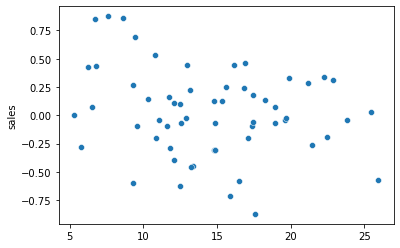

In [528]:
#visualizing Scatter Plot between Y_pred and residual
sns.scatterplot(Y_pred,residual)
plt.show()

### **Observation**<br>- There exists a linear relationship between Y_pred and residual

## <font color=purple> Assumption - Homoscedasticity</font>

### **Observation**<br>- The Assumption of Homoscedastity fails, since the variance of residual are not constant across independent variable.

## <font color=purple> Assumption - Normality of Residual</font>

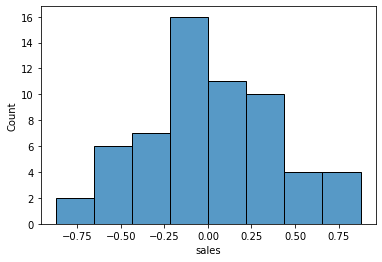

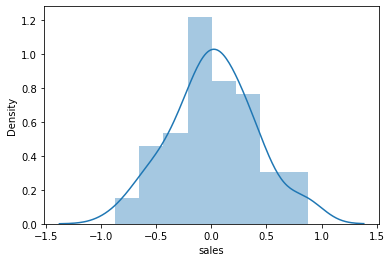

Residual Skewness :  0.07135639672976511


In [529]:
sns.histplot(residual)
plt.show()
sns.distplot(residual)
plt.show()
#check skewness
print("Residual Skewness : ", residual.skew())

### **Observation**<br>- Residuals are Normally distributed.

## After increasing the degree to 3, We have passed 3 assumption out of 4 i.e. Multicollinearity assumption, normally distributed curve assumption, linear relation assumption only fail the assumption of Homoskedastic